In [ ]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score


In [3]:
# Upload CSV manually or use link if available
from google.colab import files
uploaded = files.upload()

# Load dataset
df = pd.read_csv("/content/Mall_Customers.csv")
df.head()


Saving Mall_Customers.csv to Mall_Customers (1).csv


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
# Drop non-numeric or irrelevant columns (e.g., CustomerID, Gender if needed)
df_cleaned = df.drop(["CustomerID", "Gender"], axis=1)

# Optional: Normalize the data (important for clustering)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_cleaned)


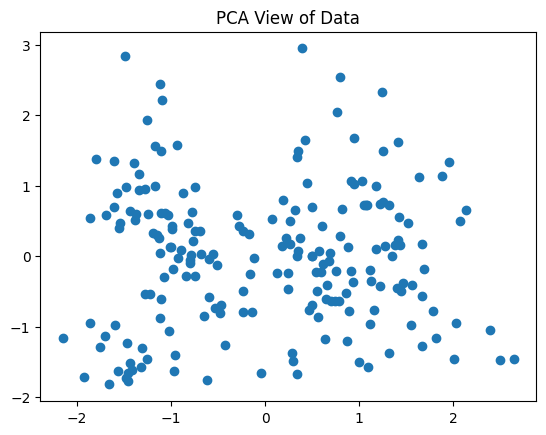

In [5]:
# Reduce to 2D for visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.scatter(X_pca[:,0], X_pca[:,1])
plt.title("PCA View of Data")
plt.show()


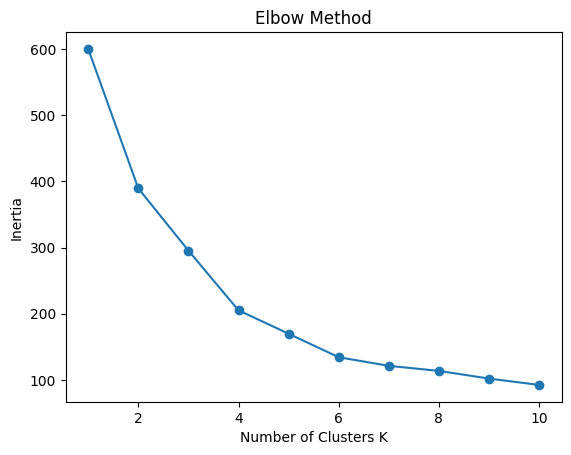

In [6]:
# Try K from 1 to 10
inertia = []
K_range = range(1, 11)
for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

# Plot the elbow
plt.plot(K_range, inertia, marker='o')
plt.xlabel('Number of Clusters K')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.show()


In [7]:
# Assume optimal K = 5 from elbow plot
kmeans = KMeans(n_clusters=5, random_state=42)
cluster_labels = kmeans.fit_predict(X_scaled)


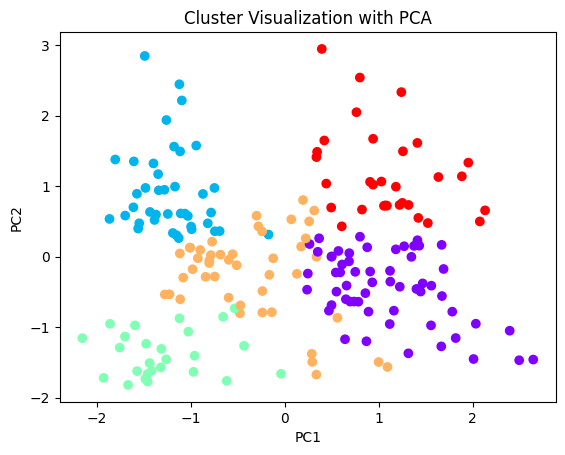

In [8]:
# Visualize clusters in PCA view
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=cluster_labels, cmap='rainbow')
plt.title("Cluster Visualization with PCA")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()


In [9]:
score = silhouette_score(X_scaled, cluster_labels)
print("Silhouette Score:", score)


Silhouette Score: 0.40846873777345605
